# LSTM

In [1]:
import os
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

data_dir= os.path.join(os.getcwd(),"data","IoTData.xlsx")
Preprocessed_data = pd.read_excel(data_dir)
Preprocessed_data.head()
print("="*50)
print("First Five Rows ","\n")
print(Preprocessed_data.head(),"\n")

print("="*50)
print("Information About Dataset","\n")
print(Preprocessed_data.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(Preprocessed_data.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(Preprocessed_data.isnull().sum(),"\n")

First Five Rows  

             DATETIME  TEMP_AIR  UMIDADE_REL      KW     KW2
0 2019-09-15 00:00:00      18.7         80.0  690.48  69.048
1 2019-09-15 01:00:00      18.2         83.0  685.44  68.544
2 2019-09-15 02:00:00      18.2         83.0  656.88  65.688
3 2019-09-15 03:00:00      18.2         83.0  655.20  65.520
4 2019-09-15 04:00:00      18.3         82.0  660.24  66.024 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     8336 non-null   datetime64[ns]
 1   TEMP_AIR     8335 non-null   float64       
 2   UMIDADE_REL  8335 non-null   float64       
 3   KW           8336 non-null   float64       
 4   KW2          8336 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 325.8 KB
None 

Describe the Dataset  

          TEMP_AIR  UMIDADE_REL           KW

In [2]:
Preprocessed_data=Preprocessed_data.drop(columns=["KW2"])
from sklearn.impute import SimpleImputer
Preprocessed_data['TEMP_AIR'].fillna(Preprocessed_data['TEMP_AIR'].mean(), inplace=True)
Preprocessed_data['UMIDADE_REL'].fillna(Preprocessed_data['UMIDADE_REL'].mean(),inplace=True)
Preprocessed_data.head()

,DATETIME,TEMP_AIR,UMIDADE_REL,KW
0,2019-09-15 00:00:00,18.7,80.0,690.48
1,2019-09-15 01:00:00,18.2,83.0,685.44
2,2019-09-15 02:00:00,18.2,83.0,656.88
3,2019-09-15 03:00:00,18.2,83.0,655.20
4,2019-09-15 04:00:00,18.3,82.0,660.24


Text(0.5, 1.0, 'Energy Distribution')

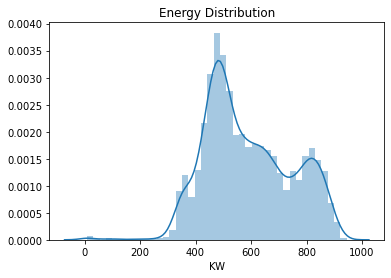

In [3]:
import seaborn as sns

sns.distplot(Preprocessed_data["KW"])
plt.title("Energy Distribution")

In [5]:
df = Preprocessed_data

In [6]:
df.set_index("DATETIME", drop=False, inplace=True)
df.DATETIME = pd.to_datetime(df.DATETIME, format="%Y-%m-%d")
df["year"] = df.DATETIME.dt.year
df["month"] = df.DATETIME.dt.month
df["week"] = df.DATETIME.dt.week
df["day"] = df.DATETIME.dt.day
df["day_of_week"] = df.DATETIME.dt.dayofweek
df.head()

,DATETIME,TEMP_AIR,UMIDADE_REL,KW,year,month,week,day,day_of_week
DATETIME,,,,,,,,,
2019-09-15 00:00:00,2019-09-15 00:00:00,18.7,80.0,690.48,2019,9,37,15,6
2019-09-15 01:00:00,2019-09-15 01:00:00,18.2,83.0,685.44,2019,9,37,15,6
2019-09-15 02:00:00,2019-09-15 02:00:00,18.2,83.0,656.88,2019,9,37,15,6
2019-09-15 03:00:00,2019-09-15 03:00:00,18.2,83.0,655.20,2019,9,37,15,6
2019-09-15 04:00:00,2019-09-15 04:00:00,18.3,82.0,660.24,2019,9,37,15,6


In [7]:
# How many Unique Year do we Have in Dataset 
print(df.year.unique(),"\n")
print(df.month.unique(),"\n")
print("Total Number of Unique Year", df.year.unique(), "\n")
print("Total Number of Unique Months", df.month.unique(), "\n")

[2019 2020] 

[ 9 10 11 12  1  2  3  4  5  6  7  8] 

Total Number of Unique Year [2019 2020] 

Total Number of Unique Months [ 9 10 11 12  1  2  3  4  5  6  7  8] 



We have data for 1 year only... So understand yealy pattern, we need more years of data.

Lets us see the energy consumption within an year

In [8]:
df.set_index("DATETIME", drop=False, inplace=True)
df.DATETIME = pd.to_datetime(df.DATETIME, format="%Y-%m-%d")
df["year"] = df.DATETIME.dt.year
df["month"] = df.DATETIME.dt.month
df["week"] = df.DATETIME.dt.week
df["day"] = df.DATETIME.dt.day
df['hour'] = df['DATETIME'].dt.hour
df["day_of_week"] = df.DATETIME.dt.dayofweek
df['weekofyear'] = df['DATETIME'].dt.weekofyear
df.head()

,DATETIME,TEMP_AIR,UMIDADE_REL,KW,year,month,week,day,day_of_week,hour,weekofyear
DATETIME,,,,,,,,,,,
2019-09-15 00:00:00,2019-09-15 00:00:00,18.7,80.0,690.48,2019,9,37,15,6,0,37
2019-09-15 01:00:00,2019-09-15 01:00:00,18.2,83.0,685.44,2019,9,37,15,6,1,37
2019-09-15 02:00:00,2019-09-15 02:00:00,18.2,83.0,656.88,2019,9,37,15,6,2,37
2019-09-15 03:00:00,2019-09-15 03:00:00,18.2,83.0,655.20,2019,9,37,15,6,3,37
2019-09-15 04:00:00,2019-09-15 04:00:00,18.3,82.0,660.24,2019,9,37,15,6,4,37


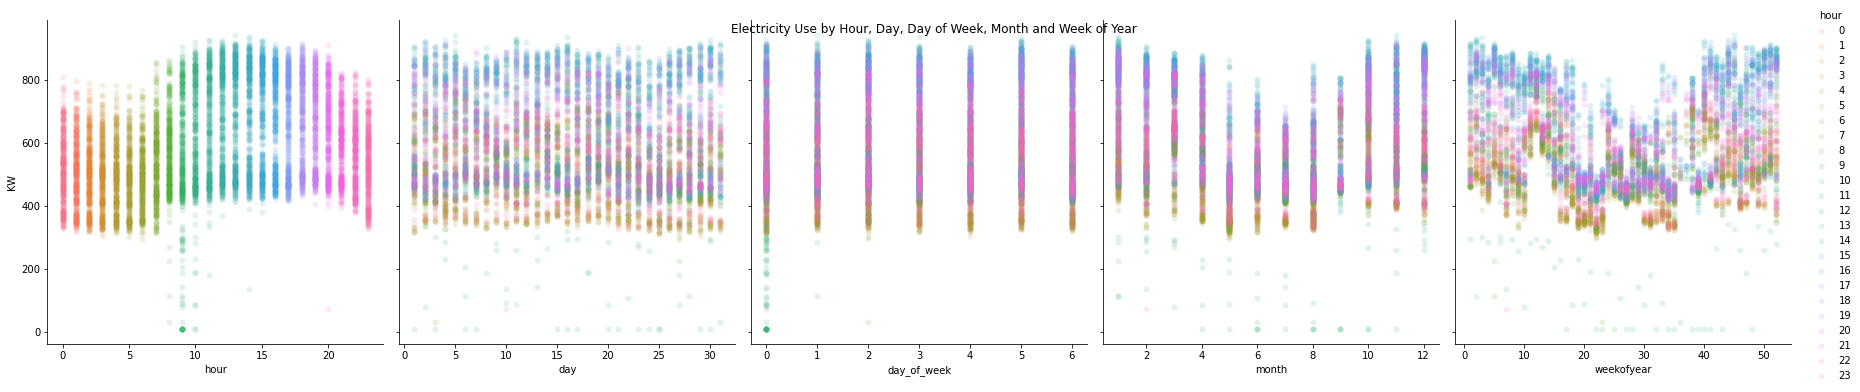

In [9]:
sns_plot = sns.pairplot(df.dropna(),
             hue='hour',
             x_vars=['hour','day','day_of_week',
                     'month','weekofyear'],
             y_vars='KW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Electricity Use by Hour, Day, Day of Week, Month and Week of Year')
plt.show()

Observations
#Hourly
1. Lowest energy got consumed around 6AM and then energy demand increaes till 14.00. Max energy consumed is around 950 KW around 2.00PM on daily basis.
2. Post 2/3PM energy demand decreases and on daily basis min energy consumed is around 750KW (at 6AM) to 800KW(at 12Am midnight)
#Monthly
1. Energy demand is high during month end, mid and Month start around 950KW.
#Weekly
1. Energy Demand is always constant for all weekdays
#Monthly
1. Energy demand is lowest in July month and starts increaseing towards year end and year start. 
2. Energy demand is low during June/July/September.


# Resampleing Data


In [10]:
NewDataSet = df.resample('D').mean()

print("Old Set Shape ", df.shape)
print("Validation Set Shape ", NewDataSet.shape)
NewDataSet.head()

Old Set Shape  (8336, 11)
Validation Set Shape  (352, 10)


,TEMP_AIR,UMIDADE_REL,KW,year,month,week,day,day_of_week,hour,weekofyear
DATETIME,,,,,,,,,,
2019-09-15,23.066667,63.958333,616.910000,2019.0,9.0,37.0,15.0,6.0,11.500000,37.0
2019-09-16,28.072222,38.111111,513.053333,2019.0,9.0,38.0,16.0,0.0,14.166667,38.0
2019-09-17,26.787500,41.583333,688.380000,2019.0,9.0,38.0,17.0,1.0,11.500000,38.0
2019-09-18,25.820833,42.666667,751.520000,2019.0,9.0,38.0,18.0,2.0,11.500000,38.0
2019-09-19,22.186364,64.863636,724.843636,2019.0,9.0,38.0,19.0,3.0,12.318182,38.0


In [12]:
TestData = NewDataSet.tail(60)

Training_Set = NewDataSet.iloc[:,2]

Training_Set = Training_Set[:-60]

Training_Set= pd.DataFrame(Training_Set,columns = ['KW'])
print(Training_Set.shape)
Training_Set.head()

(292, 1)


,KW
DATETIME,
2019-09-15,616.910000
2019-09-16,513.053333
2019-09-17,688.380000
2019-09-18,751.520000
2019-09-19,724.843636


In [13]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (292, 1)
Test Set Shape  (60, 10)


In [14]:
Training_Set = Training_Set.values
Training_Set

array([[616.91      ],
       [513.05333333],
       [688.38      ],
       [751.52      ],
       [724.84363636],
       [690.06      ],
       [579.95      ],
       [507.01      ],
       [428.26      ],
       [466.27      ],
       [466.55      ],
       [463.61      ],
       [574.07      ],
       [527.59      ],
       [473.13      ],
       [504.77      ],
       [731.36      ],
       [729.26      ],
       [712.25      ],
       [722.26      ],
       [754.74      ],
       [724.36      ],
       [512.12      ],
       [479.78      ],
       [493.15      ],
       [654.29      ],
       [765.87      ],
       [762.72      ],
       [780.64      ],
       [718.9       ],
       [648.18782609],
       [561.76      ],
       [646.03      ],
       [710.07999883],
       [706.93      ],
       [610.82      ],
       [453.95      ],
       [556.99      ],
       [615.16      ],
       [613.9       ],
       [644.42      ],
       [641.41      ],
       [677.32      ],
       [675

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train.shape

(292, 1)

In [16]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(232, 60, 1)
(232, 1)


In [17]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(232, 60, 1)

# Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


ImportError: Could not find 'nvcuda.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Typically it is installed in 'C:\Windows\System32'. If it is not present, ensure that you have a CUDA-capable GPU with the correct driver installed.